<a href="https://colab.research.google.com/github/UmitOzteker/TensorFlow-Projects/blob/main/02_neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow İle Neural Network Classification

Veri analizinde kullanılan yöntemleri uygulayarak verileri sınıflandırma, bir dizi girdi verisi için sınıflandırma modelleri oluşturmak için kullanılan bir prosedürdür

Classification Tipleri:
* Binary Classification
* Multiclass Classification
* Multilabel Classification

# Data Oluşturma

In [3]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
     noise=0.03,
     random_state=42)

Make Circles 2d boyutunda büyük bir dairenin içine küçük bir daire oluşturur

* **noise parametresi**: Bu parametre veri noktalarına eklenen rastgele hatanın şiddetini belirler. 0.03'lük bir değer, gürültünün neden olduğu maksimum yer değiştirmenin dairelerin yarıçaplarının %3'ü olacağı anlamına gelir. Basitçe ifade edersek, mükemmel dairelerin etrafında hafif bir bulanıklık oluşturur.

In [4]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [5]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [6]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


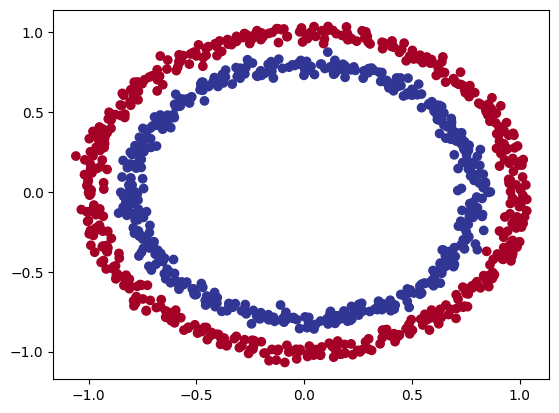

In [7]:
# plot ile Görselleştirme
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

# Input ve Output Şekilleri

In [8]:
 # Label ve feature'ların şekillerinin kontrolü
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
len(X), len(y)

(1000, 1000)

In [10]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

# Modelleme Adımları

In [11]:
import tensorflow as tf
tf.random.set_seed(42)

# Model Oluşturma
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Modeli Compile Etme
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# Modeli Fit Etme
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
32/32 [==============================] - 2s 11ms/step - loss: 5.1866 - accuracy: 0.4977
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 5.9306 - accuracy: 0.5106
Epoch 3/5
32/32 [==============================] - 0s 5ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000


In [12]:
# Daha uzun eğiterek modeli geliştirme

model.fit(tf.expand_dims(X, axis=-1), y, epochs=200)
model.evaluate(X, y)

Epoch 1/200
32/32 [==============================] - 0s 6ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/200
32/32 [==============================] - 0s 8ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/200
32/32 [==============================] - 0s 7ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/200
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/200
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/200
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/200
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

[7.712474346160889, 0.5]

In [13]:
tf.random.set_seed(42)

# Model Oluşturma
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Modeli Compile Etme
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# Modeli Fit Etme
model_2.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose=0)

In [14]:
# Modeli Evaluate etme
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932390332221985, 0.5]

In [15]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

#Modeli Geliştirme

In [16]:
tf.random.set_seed(42)

# Model Oluşturma
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Modeli Compile Etme
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Modeli Fit Etme
model_3.fit(tf.expand_dims(X, axis=-1),y , epochs=100, verbose=0)



In [17]:
# Modeli Evaluate etme
model_3.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.5000


[0.693997859954834, 0.5]

In [18]:
model_3.predict(X)

32/32 [==============================] - 0s 3ms/step


array([[[0.5131197 ],
        [0.5180524 ]],

       [[0.52737135],
        [0.5187904 ]],

       [[0.5279302 ],
        [0.51860154]],

       ...,

       [[0.5215283 ],
        [0.52787954]],

       [[0.51391125],
        [0.5274784 ]],

       [[0.5175846 ],
        [0.51114225]]], dtype=float32)

Tahminleri görselleştirmek için fonksiyon oluşturma

In [19]:
import numpy as np

def plot_decision_boundary(model, X, y):

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 3ms/step
doing binary classifcation...


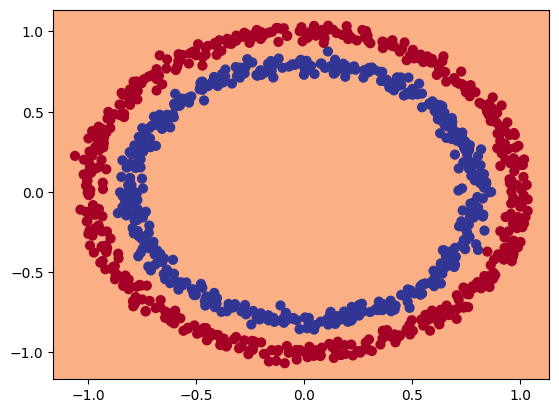

In [20]:
# Tahminleri Kontrol Etm
plot_decision_boundary(model_3, X, y)

In [21]:
tf.random.set_seed(42)

# Regression veri Oluşturma
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

X_regression, y_regression

# Veriyi eğitim ve test verisine bölme
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Modeli regression data ile fit etme
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: -3838.8967 - accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: -7152.4551 - accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: -7190.0151 - accuracy: 0.0000e+00
Epoch 10/100
5/5 [==============================] - 0s 

Model 3 binary classification problem için hazırlandığı için yukarıda çalışmadı


In [22]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit
model_4.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 329.4670 - mae: 329.4670
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 208.9202 - mae: 208.9202
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 92.8300 - mae: 92.8300
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 57.5055 - mae: 57.5055
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 77.8867 - mae: 77.8867
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 57.4378 - mae: 57.4378
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 43.4989 - mae: 43.4989
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 46.4082 - mae: 46.4082
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 42.2917 - mae: 42.2917
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 43.1112 - mae: 43.1112
Epoch 11/100
5/5 [==============================] - 0s 

2/2 [==============================] - 0s 5ms/step


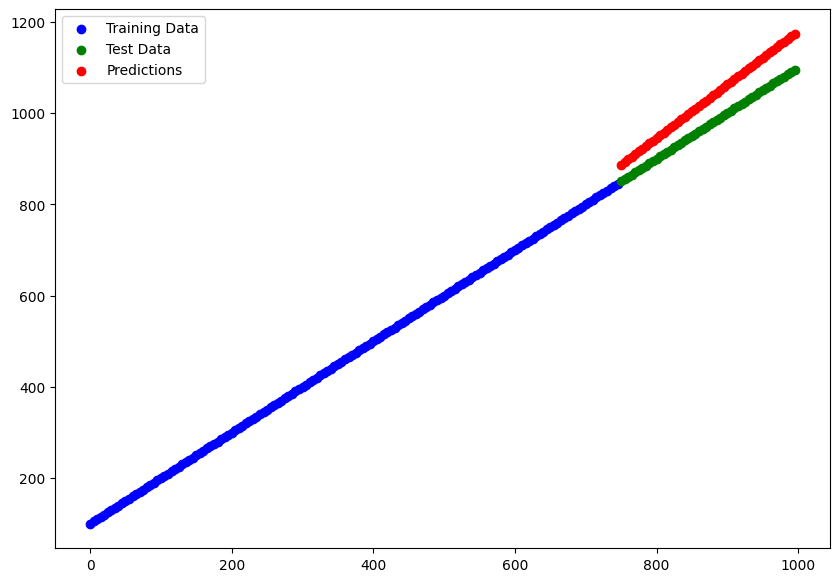

In [23]:
y_reg_preds = model_4.predict(X_reg_test)

plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training Data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test Data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

In [24]:
tf.random.set_seed(42)

model_5= tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_5.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.2792 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1330 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9355 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7908 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6558 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.5068 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.3254 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.0729 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 2.6147 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 1.3234 - accuracy: 0.5000
Epoch 11/

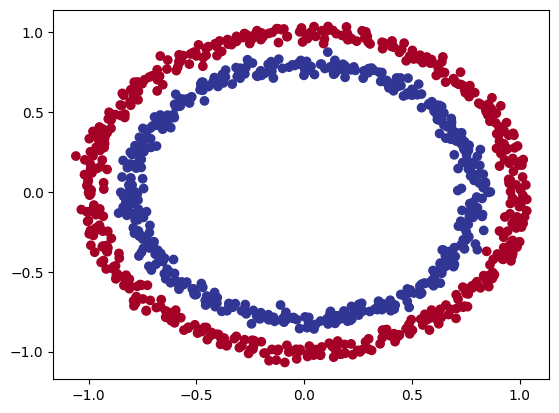

In [25]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...


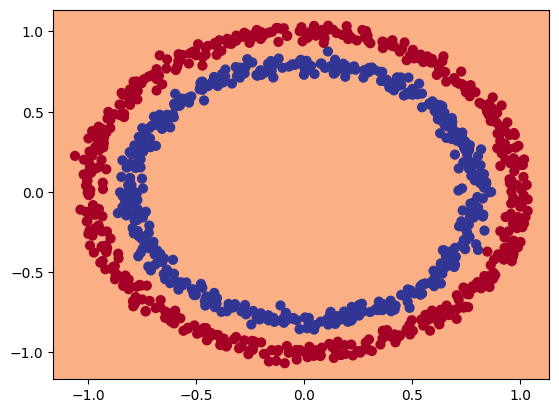

In [26]:
plot_decision_boundary(model_5, X, y)

In [27]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

model_6.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.2958 - accuracy: 0.4965
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2281 - accuracy: 0.4985
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1991 - accuracy: 0.4982
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1494 - accuracy: 0.4995
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0769 - accuracy: 0.4991
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0294 - accuracy: 0.4987
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9852 - accuracy: 0.4992
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9751 - accuracy: 0.4983
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9397 - accuracy: 0.4985
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9011 - accuracy: 0.5008
Epoch 11/

In [28]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
    ])

model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

model_7.fit(tf.expand_dims(X, axis=-1), y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 3ms/step - loss: 4.5150 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 3ms/step - loss: 2.3585 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 3ms/step - loss: 1.5618 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 3ms/step - loss: 1.4766 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 3ms/step - loss: 1.4119 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 3ms/step - loss: 1.3560 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 8ms/step - loss: 1.3070 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 7ms/step - loss: 1.2633 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 6ms/step - loss: 1.2240 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 9ms/step - loss: 1.1873 - accuracy: 0.5000
Epoch 11/

In [29]:
model_7.evaluate(X, y)

32/32 [==============================] - 1s 3ms/step - loss: 0.6935 - accuracy: 0.4980


[0.6934667229652405, 0.49803125858306885]

313/313 [==============================] - 2s 5ms/step
doing binary classifcation...


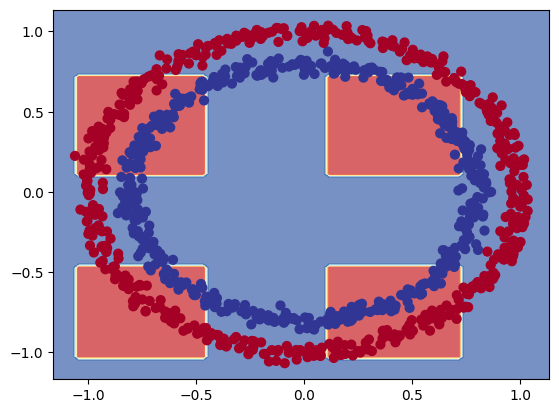

In [30]:
plot_decision_boundary(model_7, X, y)

In [51]:
tf.random.set_seed(42)

# Create a model
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

# Fit the model
history = model_8.fit(X, y, epochs=150, verbose=1)

Epoch 1/150
32/32 [==============================] - 1s 3ms/step - loss: 0.6975 - accuracy: 0.5050
Epoch 2/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.5060
Epoch 3/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.5010
Epoch 4/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4920
Epoch 5/150
32/32 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.4890
Epoch 6/150
32/32 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.4910
Epoch 7/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5030
Epoch 8/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5030
Epoch 9/150
32/32 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.5030
Epoch 10/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.5050
Epoch 11/

In [52]:
model_8.evaluate(X, y)

32/32 [==============================] - 0s 4ms/step - loss: 0.2548 - accuracy: 0.9300


[0.25484272837638855, 0.9300000071525574]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


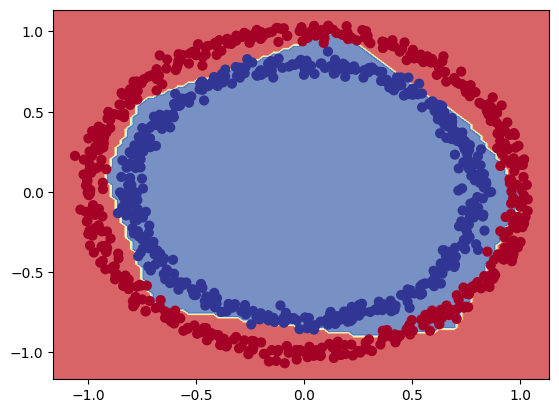

In [53]:
plot_decision_boundary(model_8, X, y)

In [54]:
A = tf.cast(tf.range(-10, 10), tf.float32)

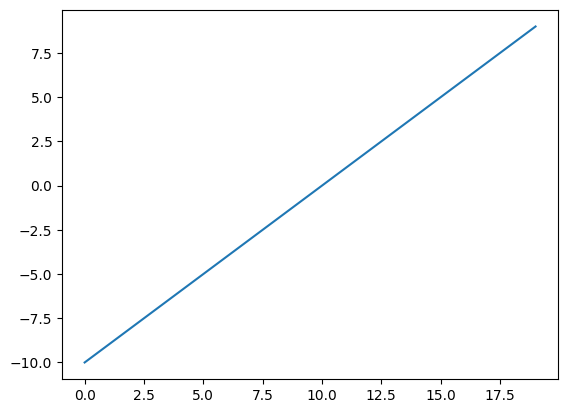

In [55]:
plt.plot(A)

In [56]:
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>


Sigmoid activation function, makine öğreniminde yapay sinir ağlarının katmanlarında kullanılan bir matematiksel fonksiyondur. S-şeklinde bir eğrisi olan sigmoid fonksiyon, bir nevi giriş değerlerini 0 ile 1 arası bir sınıra "sıkıştırır". Bu sıkıştırma sayesinde sinir ağları özellikle olasılık tahmini yapmak için kullanıldığında sigmoid fonksiyon çok faydalı olur. Çünkü olasılıklar daima 0 ile 1 arasında değerler alır.

**Avantajları**:

* Çıktıyı 0 ve 1 arasına sıkıştırmasıyla özellikle sınıflandırma problemlerinde ve olasılık tahminlerinde kullanışlıdır.
* Hesaplanması kolaydır.

**Dezavantajları**:

* Sigmoid fonksiyonunun grafiğinin yatay asimptotları vardır. Bu, sinir ağlarında gradyanların yok olmasına neden olabilir ve ağın öğrenmesini zorlaştırabilir.
* Sigmoid fonksiyonu bazı durumlarda doygunluğa ulaşabilir. Yani, girişteki büyük değişiklikler çıktıdaki küçük değişikliklere yol açabilir.



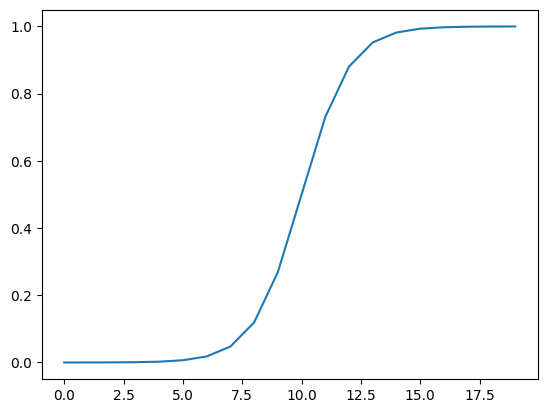

In [57]:
plt.plot(sigmoid(A))

In [59]:
def relu(x):
  return tf.maximum(0, x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

In [60]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

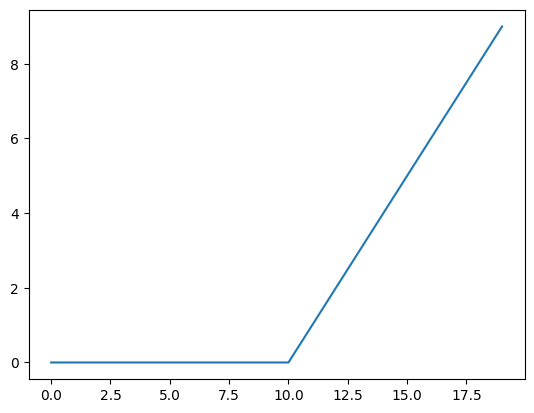

In [61]:
plt.plot(relu(A))

In [62]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

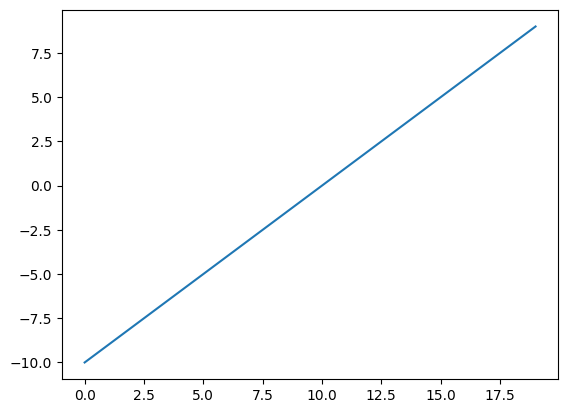

In [63]:
plt.plot(tf.keras.activations.linear(A))

In [64]:
A == tf.keras.activations.linear(A)
# A ve linear A eşit

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

# Classification Modeli Geliştirme

In [66]:
len(X)

1000

In [68]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]


In [69]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [77]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model_9.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["Accuracy"])

history = model_9.fit(X_train, y_train, epochs=50)

Epoch 1/50
25/25 [==============================] - 1s 3ms/step - loss: 0.6887 - Accuracy: 0.5088
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6878 - Accuracy: 0.5113
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6871 - Accuracy: 0.5150
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6866 - Accuracy: 0.5213
Epoch 5/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6859 - Accuracy: 0.5213
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6854 - Accuracy: 0.5225
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6846 - Accuracy: 0.5263
Epoch 8/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6842 - Accuracy: 0.5263
Epoch 9/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6836 - Accuracy: 0.5288
Epoch 10/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6830 - Accuracy: 0.5300
Epoch 11/50
25/25 [

In [78]:
model_9.evaluate(X_test, y_test)

7/7 [==============================] - 0s 6ms/step - loss: 0.5394 - Accuracy: 0.8200


[0.5394296646118164, 0.8199999928474426]

313/313 [==============================] - 1s 3ms/step
doing binary classifcation...
313/313 [==============================] - 0s 2ms/step
doing binary classifcation...


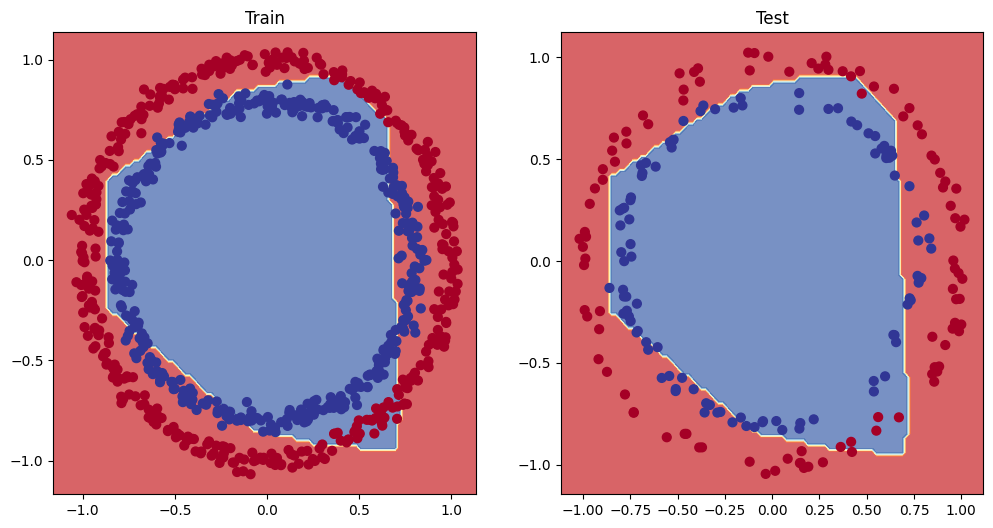

In [79]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_9, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_9, X=X_test, y=y_test)
plt.show()